# **Descripción de la actividad**

Trabajas en una empresa de tecnología y el gerente te ha pedido desarrollar un modelo de aprendizaje supervisado que pueda predecir el precio de las laptops a partir de sus especificaciones.

* La empresa ha recopilado datos de más de 1300 laptops (ver anexo), incluyendo información como la marca, el modelo, el tamaño de la pantalla, la capacidad de almacenamiento, la memoria RAM, el procesador, la tarjeta gráfica y el sistema operativo.

* Con estos datos, tu objetivo es construir un modelo que pueda predecir de manera precisa el precio de una laptop dada.

* Deberás presentar un notebook detallando las etapas del flujo de trabajo de tu solución de machine learning para el caso descrito


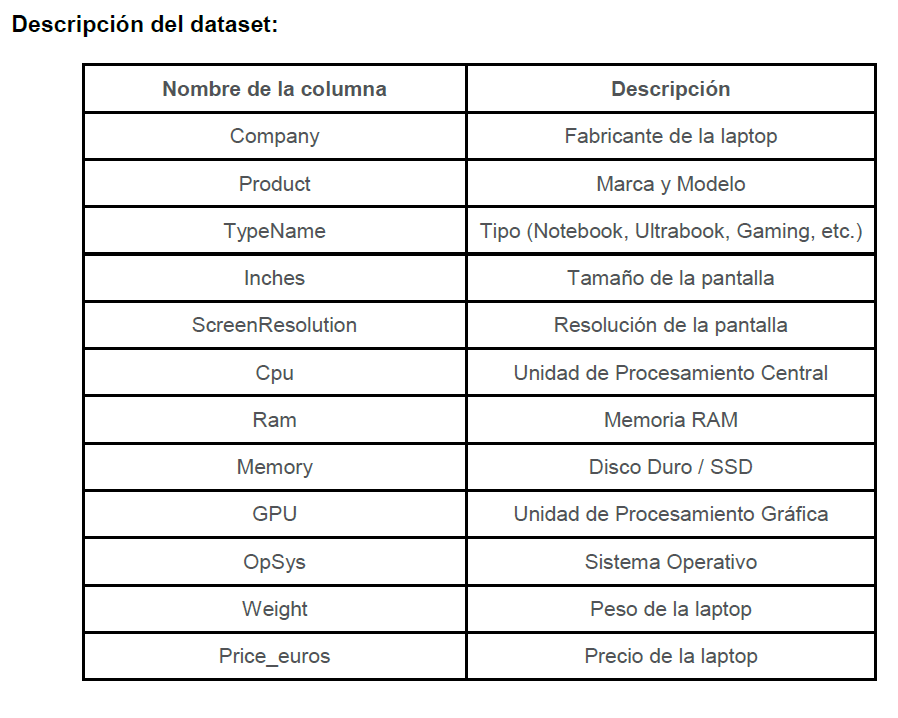

# **CRITERIO 1) Análisis exploratorio de datos**

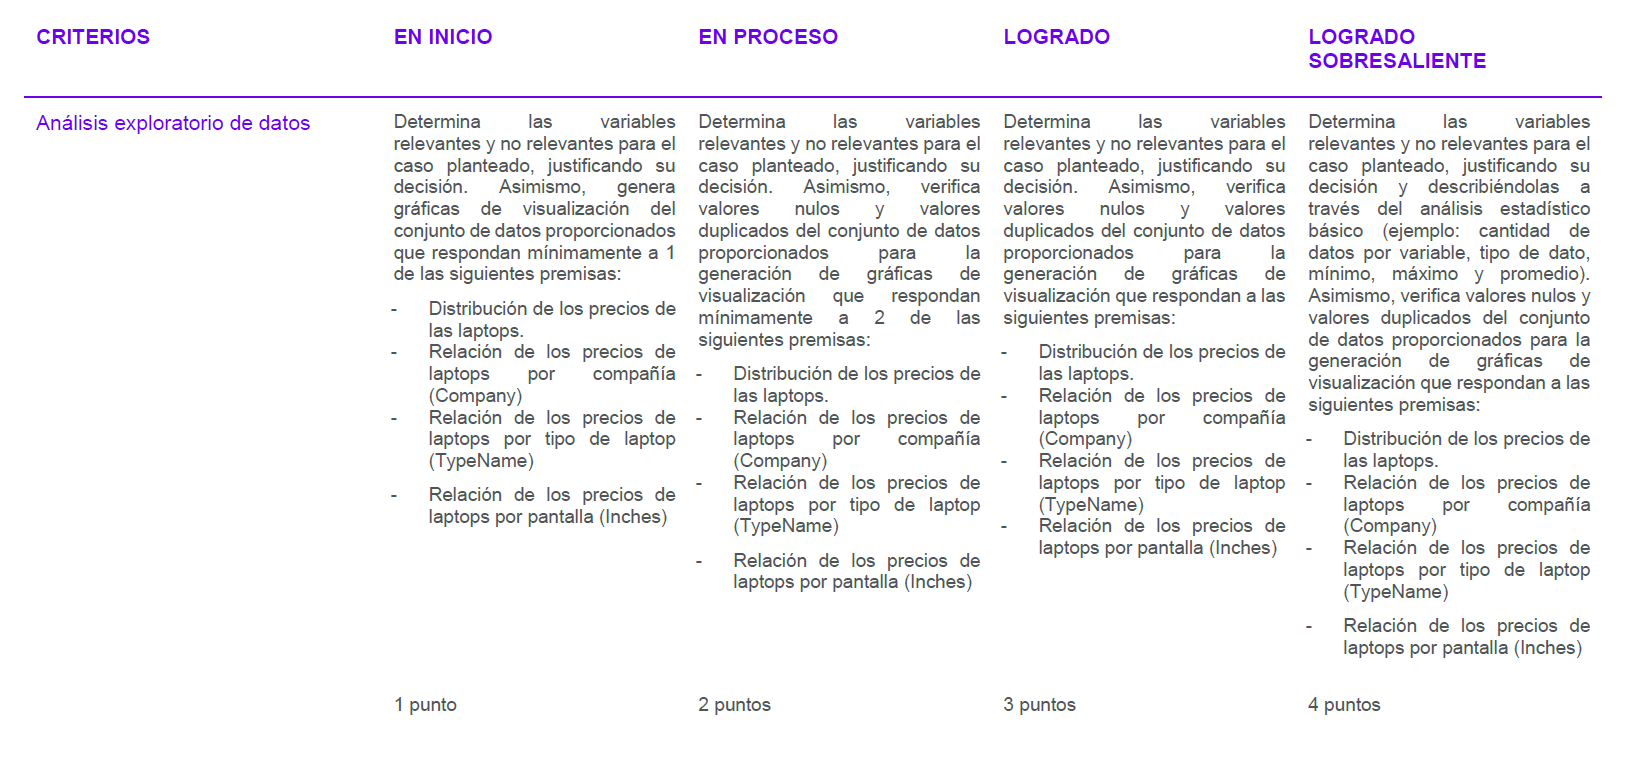

Visualizaciones: Analisis Exploratorio de los Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [ ]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

In [ ]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


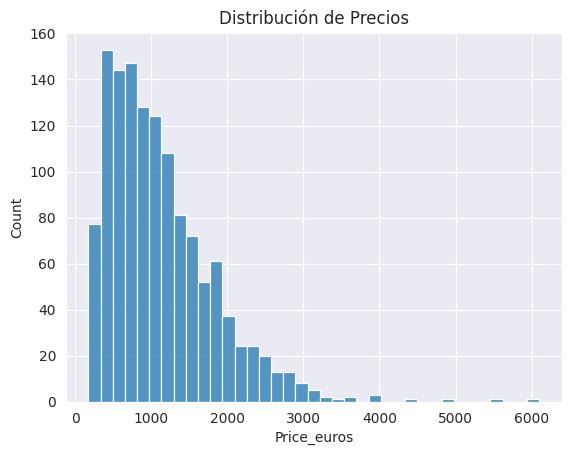

In [ ]:
# Grafico 1: Histograma (Precios)

sns.histplot(df['Price_euros'])
plt.title("Distribución de Precios")
plt.show()


Insights: Al parecer la mayoria de laptops esta rondando los 1000 euros

*   Elemento de la lista
*   Elemento de la lista



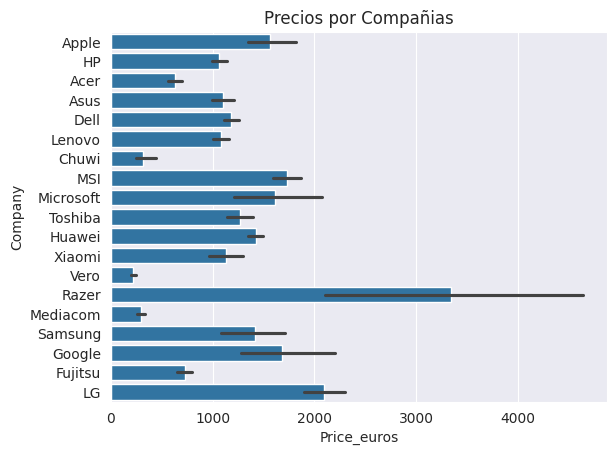

In [ ]:
# grafico 2 # Relacion de Precios de Laptops por compañia
sns.barplot(x = "Price_euros", y = "Company", data = df)
plt.title("Precios por Compañias")
plt.show()


Insights: Al parecer la mayoria de marcas sus precios son menores de 2000 mil euros.

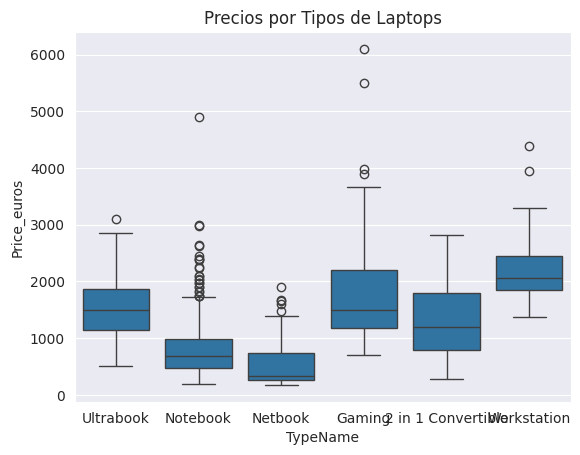

In [ ]:
# grafico 3 # Relacion de Precios de Laptops por tipo de Laptop
sns.boxplot(x = "TypeName", y = "Price_euros", data = df)
plt.title("Precios por Tipos de Laptops")
plt.show()


Insights: La mayoria de tipos de laptos su precio es menor de los 1500

Text(0.5, 1.0, 'Precios de Laptops por Pantallas')

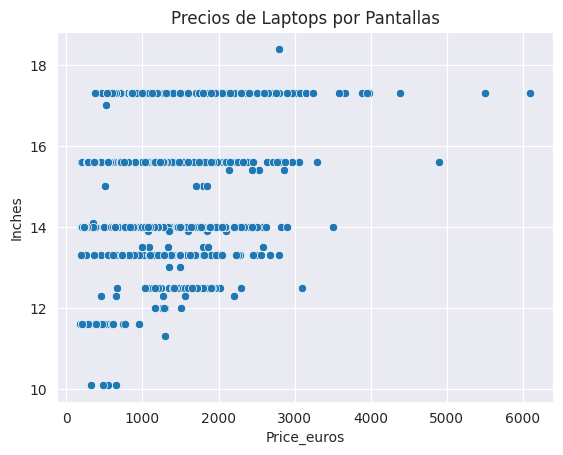

In [ ]:
# grafico 4 # Relacion de Precios de laptops por pantallas
sns.scatterplot(x = "Price_euros", y = "Inches", data = df).set_title("Precios de Laptops por Pantallas")


Insights: La mayoria de Laptop por pantallas su precio esta enntre los 1000 a 3000 euros

# **CRITERIO 2) Ingeniería de características (Feature)**

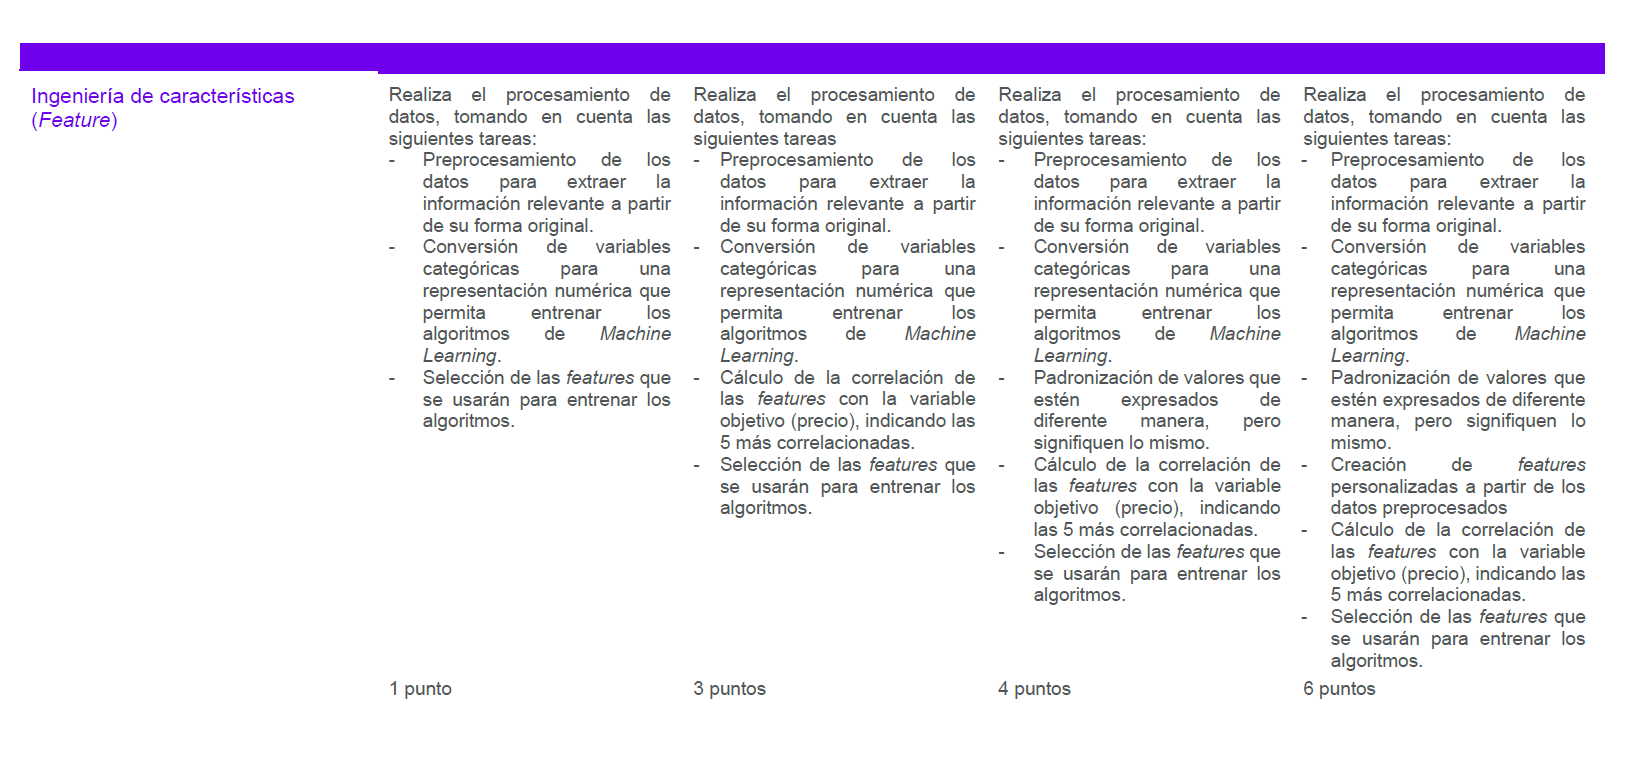

In [ ]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [ ]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
#************************
# Columna: Weight

df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [ ]:
#************************
# Columna: OpSys

df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['OpSys'], drop_first=True, dtype=int)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,1.37,1339.69,0,0,0,0,0,0,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,1.34,898.94,0,0,0,0,0,0,0,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,1.86,575.00,0,0,0,1,0,0,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,1.83,2537.45,0,0,0,0,0,0,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,1.37,1803.60,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Company             1303 non-null   object 
 2   Product             1303 non-null   object 
 3   TypeName            1303 non-null   object 
 4   Inches              1303 non-null   float64
 5   ScreenResolution    1303 non-null   object 
 6   Cpu                 1303 non-null   object 
 7   Ram                 1303 non-null   object 
 8   Memory              1303 non-null   object 
 9   Gpu                 1303 non-null   object 
 10  Weight              1303 non-null   float64
 11  Price_euros         1303 non-null   float64
 12  OpSys_Chrome OS     1303 non-null   int64  
 13  OpSys_Linux         1303 non-null   int64  
 14  OpSys_Mac OS X      1303 non-null   int64  
 15  OpSys_No OS         1303 non-null   int64  
 16  OpSys_

In [ ]:
# Columna: Cpu

len(df['Cpu'].value_counts())

118

In [ ]:
# Regular Expressions

In [ ]:
ejemplo = "Intel Core i5 2.3GHz"

float(ejemplo.split()[-1].replace("GHz", ""))

2.3

In [ ]:
df['GHz'] = df['Cpu'].apply(lambda x: x.split()[-1].replace("GHz", "")).astype(float)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Price_euros,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1339.69,0,0,0,0,0,0,0,1,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,898.94,0,0,0,0,0,0,0,1,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,575.00,0,0,0,1,0,0,0,0,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,2537.45,0,0,0,0,0,0,0,1,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1803.60,0,0,0,0,0,0,0,1,3.1


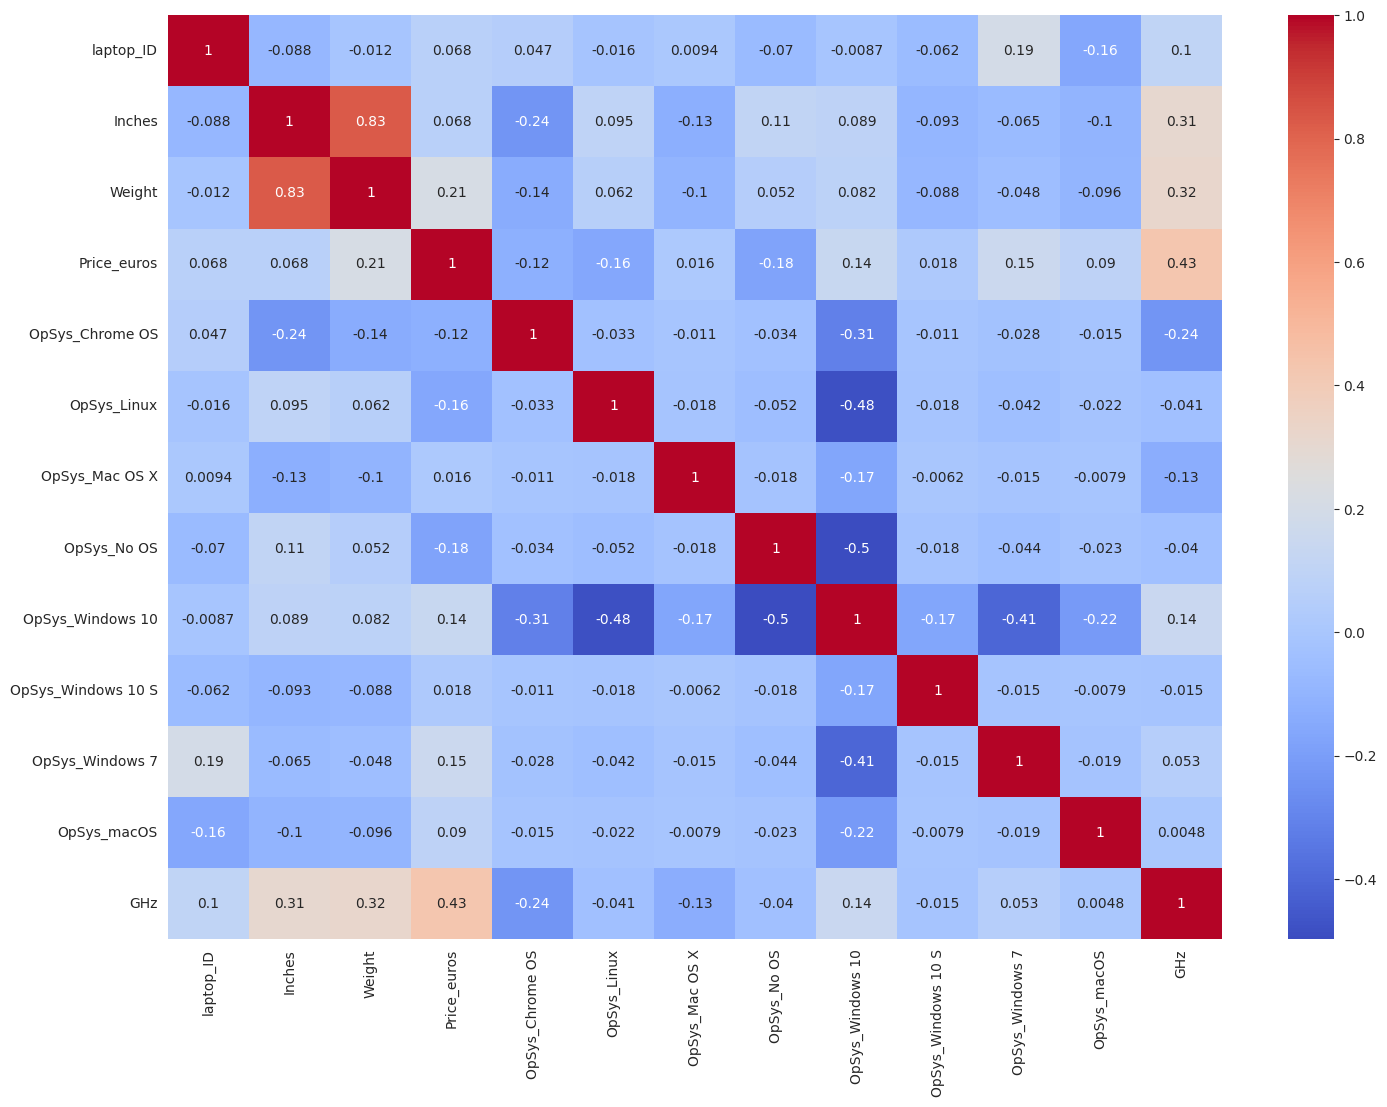

In [ ]:
plt.figure(figsize=(17, 12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
# Tarea 2:
# convertir a numerico: la columna Ram
# ubicar que 1 columna puede ser usada para OHE y aplicar OHE

In [ ]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['TypeName'], drop_first=True, dtype=int)

In [ ]:
df.head()

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,0,0,1,0
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,0,1,0
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1,0,0
3,4,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,0,0,1,0
4,5,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,0,0,1,0


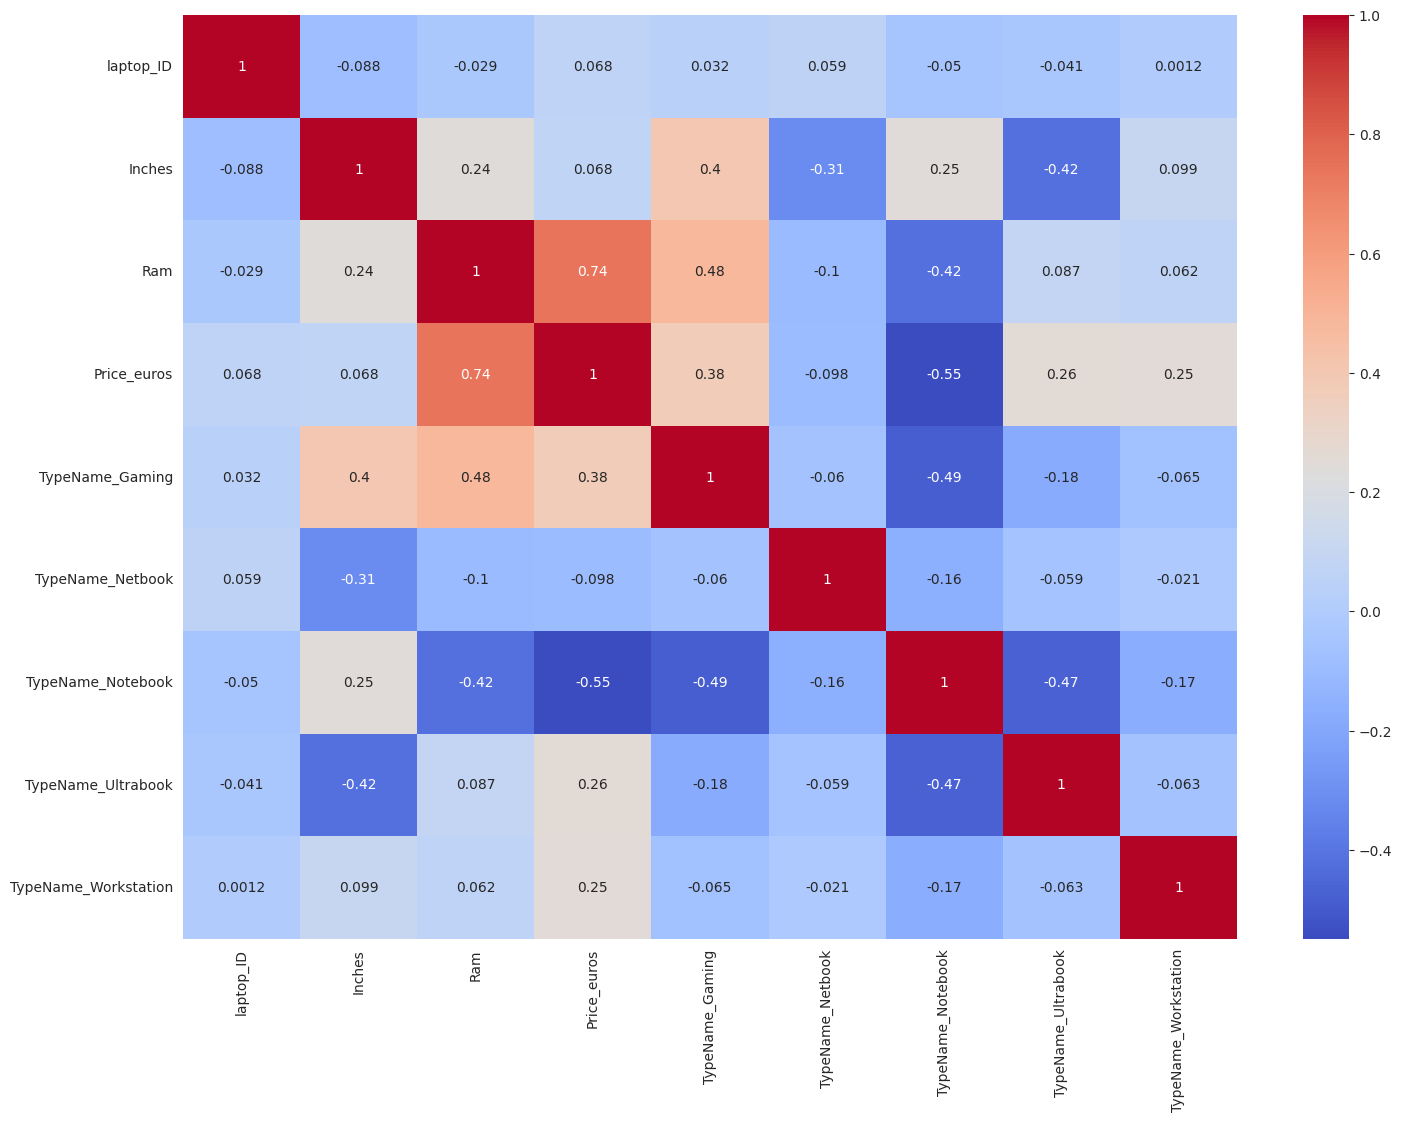

In [ ]:
plt.figure(figsize=(17, 12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

# **CRITERIO 3) Fase de entrenamiento**

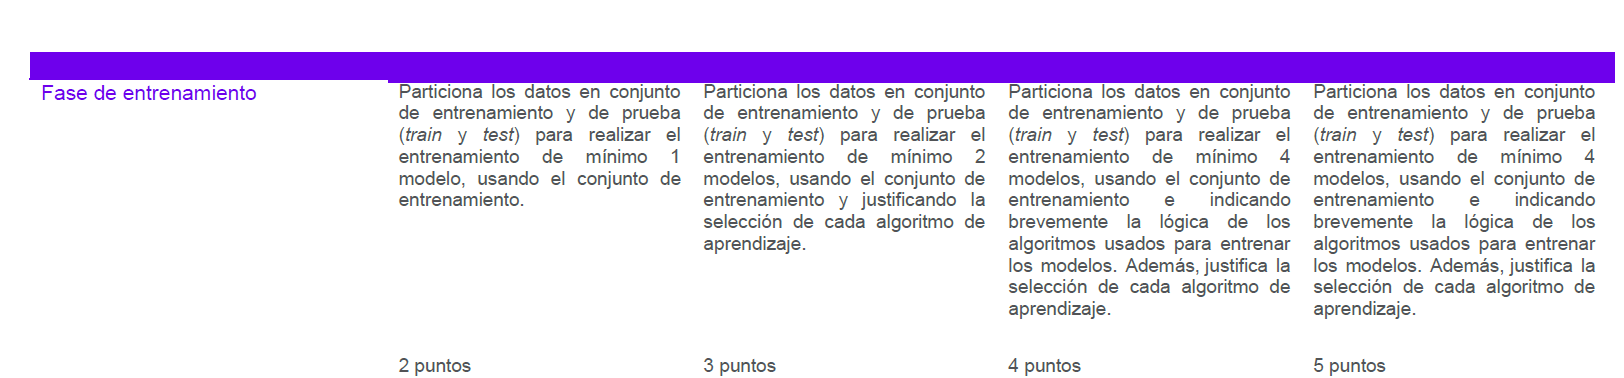

In [ ]:
# Algoritmo # 1:

# **CRITERIO 4) Fase de inferencia**

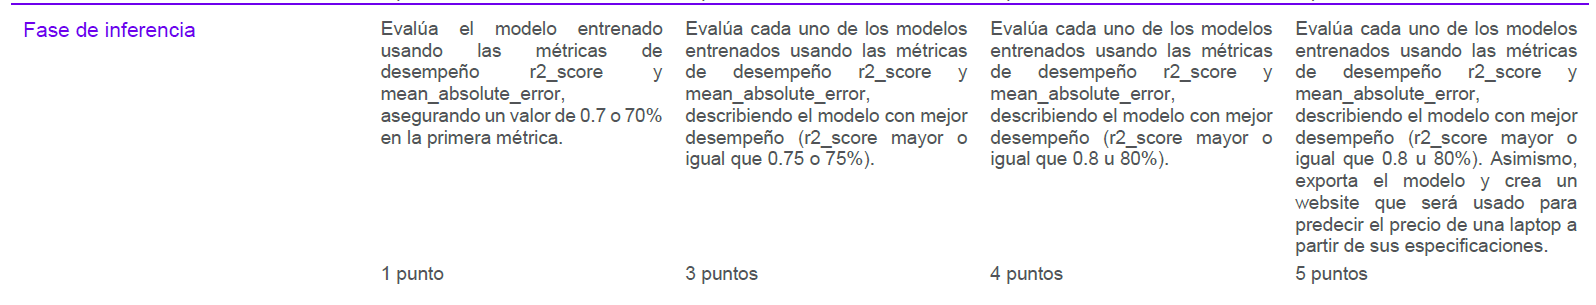

# URL de su aplicacion web
# o
# Intento (el codigo que intentaron usar)

### **NOTA:** En caso crean una aplicacion web (pagina web) usando para predecir el precio de una laptop usando pickle o Streamlit, agregar el URL de la aplicacion web aqui:

URL:

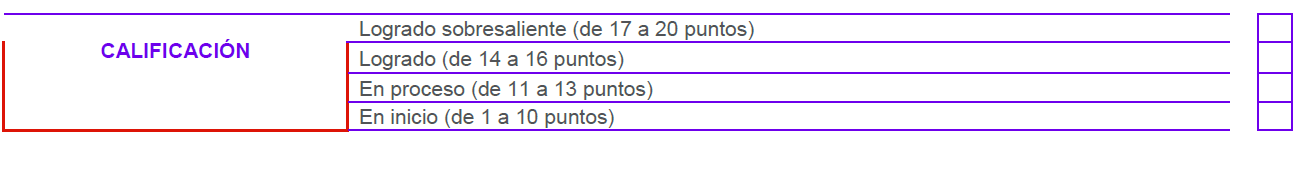